first metric that can be applied is the mean squared error, and we can also calculate the structural similarity index, the problem with these two evaluation metrics, the problem is that we need the same size for both imaGes, fits our intuition of applying isomorphism.

In [4]:

from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

# Load the images
image1 = cv2.imread('sport1610.png')
image2 = cv2.imread('sport1604.png')

# Convert the images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Compute MSE and SSIM between the two images
m = mse(gray1, gray2)
s = ssim(gray1, gray2)

print(f"Mean Squared Error: {m}")
print(f"Structural Similarity Index: {s}")


Mean Squared Error: 1635.1692952380952
Structural Similarity Index: 0.6096100972440509


In [3]:
from skimage.metrics import structural_similarity as compare_ssim
import cv2
import numpy as np

# Load images
before = cv2.imread('sport1604.png')
after = cv2.imread('sport1610.png')

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between two images
(score, diff) = compare_ssim(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

# Normalize the difference image
diff = (diff * 255).astype("uint8")

# Threshold the difference image
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Find contours from the thresholded image
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

# Draw the found contours onto a mask and onto the original 'after' image
mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

# Iterate over contours
for c in contours:
    area = cv2.contourArea(c)
    if area > 40:  # Filter out smaller areas
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.drawContours(mask, [c], 0, (255, 255, 255), -1)
        cv2.drawContours(filled_after, [c], 0, (0, 255, 0), -1)

# Save the images
# cv2.imwrite('before_with_boxes.jpg', before)
# cv2.imwrite('after_with_boxes.jpg', after)
# cv2.imwrite('diff.jpg', diff)
# cv2.imwrite('mask.jpg', mask)
# cv2.imwrite('filled_after.jpg', filled_after)
cv2.imshow('before', before)
cv2.imshow('after', after)
cv2.imshow('diff', diff)
cv2.imshow('diff_box', diff_box)
cv2.imshow('mask', mask)
cv2.imshow('filled after', filled_after)


Image Similarity: 60.9610%


NameError: name 'diff_box' is not defined

In [4]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np

# Load images
before = cv2.imread('sport14.png')
after = cv2.imread('sport16103.png')

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between the two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

cv2.imshow('before', before)
cv2.imshow('after', after)
cv2.imshow('diff', diff)
cv2.imshow('diff_box', diff_box)
cv2.imshow('mask', mask)
cv2.imshow('filled after', filled_after)
cv2.waitKey()

Image Similarity: 78.7718%


-1

In [3]:
import cv2
import numpy as np

# Load the larger image and the template image
large_image = cv2.imread('sport16102.png')
template = cv2.imread('small.png')

# Convert images to grayscale
large_image_gray = cv2.cvtColor(large_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Get the width and height of the template
w, h = template_gray.shape[::-1]

# Perform template matching
res = cv2.matchTemplate(large_image_gray, template_gray, cv2.TM_CCOEFF_NORMED)

# Define a threshold
threshold = 0.3  # You may need to adjust this threshold

# Find where the matching result exceeds the threshold
loc = np.where(res >= threshold)

# If matches are found, mark them on the large image
for pt in zip(*loc[::-1]):  # Switch columns and rows
    cv2.rectangle(large_image, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

# Display the resulting image
cv2.imshow('Detected', large_image)
cv2.imshow('Detected', template)
# Wait for a key press and then close the displayed image
cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('sport16103.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Fit ellipses to contours found
for contour in contours:
    # We need at least 5 points to fit an ellipse
    if len(contour) >= 5:
        ellipse = cv2.fitEllipse(contour)
        # You can insert additional checks here to filter ellipses
        cv2.ellipse(image, ellipse, (0, 255, 0), 2)

# Display the result
cv2.imshow('Detected Ellipses', image)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [7]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('sport16103.png')

# Convert to grayscale if you want to consider intensity only
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thresholding to get only black regions
# Adjust the threshold value as needed for your specific image
_, black_regions = cv2.threshold(gray, 15, 255, cv2.THRESH_BINARY_INV)

# Find contours of the black regions
contours, _ = cv2.findContours(black_regions, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Show the output
cv2.imshow('Black regions detected', image)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
255, 199, 127 255, 255, 203

In [6]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('sport16103.png')

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define range of yellow color in HSV
# These values can be adjusted to capture different shades of yellow
yellow = np.array([255, 255, 203])

# Threshold the HSV image to get only yellow colors
mask_yellow = cv2.inRange(hsv_image, yellow, yellow)

# Define range of orange color in HSV
# These values can be adjusted to capture different shades of orange
orange = np.array([255, 199, 127])

# Threshold the HSV image to get only orange colors
mask_orange = cv2.inRange(hsv_image, orange, orange)

# Combine the masks for yellow and orange
combined_mask = cv2.bitwise_or(mask_yellow, mask_orange)

# Bitwise-AND mask and original image
result = cv2.bitwise_and(image, image, mask=combined_mask)

# Show the image
cv2.imshow('Yellow and Orange areas', result)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [9]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('sport16103.png')

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the specific yellow color range in HSV
# Convert the specific RGB yellow to HSV
yellow = np.uint8([[[255, 255, 203]]])
yellow_hsv = cv2.cvtColor(yellow, cv2.COLOR_RGB2HSV)[0][0]

# Define a small range around that specific yellow
tolerance = 10  # Tolerance for color detection
lower_yellow = np.array([yellow_hsv[0] - tolerance, 100, 100])
upper_yellow = np.array([yellow_hsv[0], 255, 255])

# Threshold the HSV image to get only yellow colors
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Show the output
cv2.imshow('Yellow regions detected', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the result
cv2.imwrite('/path/to/save/yellow_regions_detected.jpg', image)


False

In [3]:
import networkx as nx

# Create two graphs
G1 = nx.Graph()
G2 = nx.Graph()

# Add some nodes and edges to the first graph
G1.add_edges_from([(1, 2), (2, 3), (3, 4)])

# Add similar or different nodes and edges to the second graph
G2.add_edges_from([(1, 2), (2, 3), (3, 4)])  # Change as needed

# Compare the graphs
if nx.is_isomorphic(G1, G2):
    print("The graphs are isomorphic (i.e., structurally identical).")
else:
    print("The graphs are not isomorphic.")

# Additional comparisons can be made based on nodes, edges, or graph properties


The graphs are isomorphic (i.e., structurally identical).


The graphs are isomorphic (i.e., structurally identical).


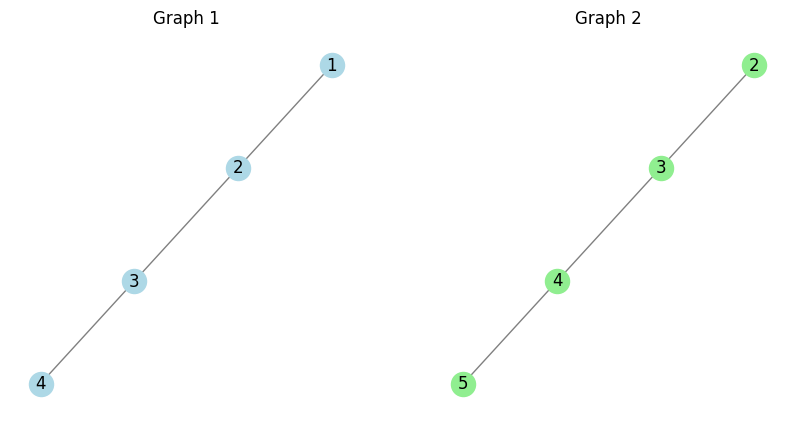

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create two graphs
G1 = nx.Graph()
G2 = nx.Graph()

# Add some nodes and edges to the first graph
G1.add_edges_from([(1, 2), (2, 3), (3, 4)])

# Add similar or different nodes and edges to the second graph
G2.add_edges_from([(2, 3), (3, 4), (4, 5)])  # Change as needed

# Compare the graphs
if nx.is_isomorphic(G1, G2):
    print("The graphs are isomorphic (i.e., structurally identical).")
else:
    print("The graphs are not isomorphic.")

# Visualize the graphs
plt.figure(figsize=(10, 5))

# Draw the first graph
plt.subplot(121)
nx.draw(G1, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Graph 1')

# Draw the second graph
plt.subplot(122)
nx.draw(G2, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title('Graph 2')

# Show the plots
plt.show()


In [8]:
import cv2

image = cv2.imread('sport16103.png')
object_detector= cv2.createBackgroundSubtractorMOG2()
mask = object_detector.apply(image)
cv2.imshow('Yellow regions detected', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

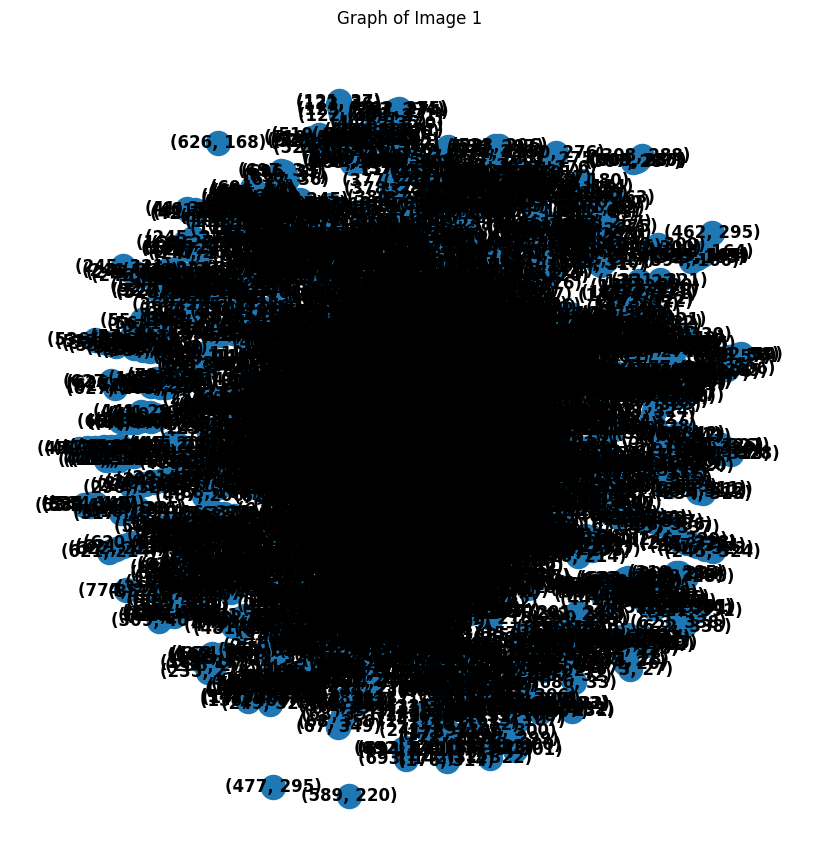

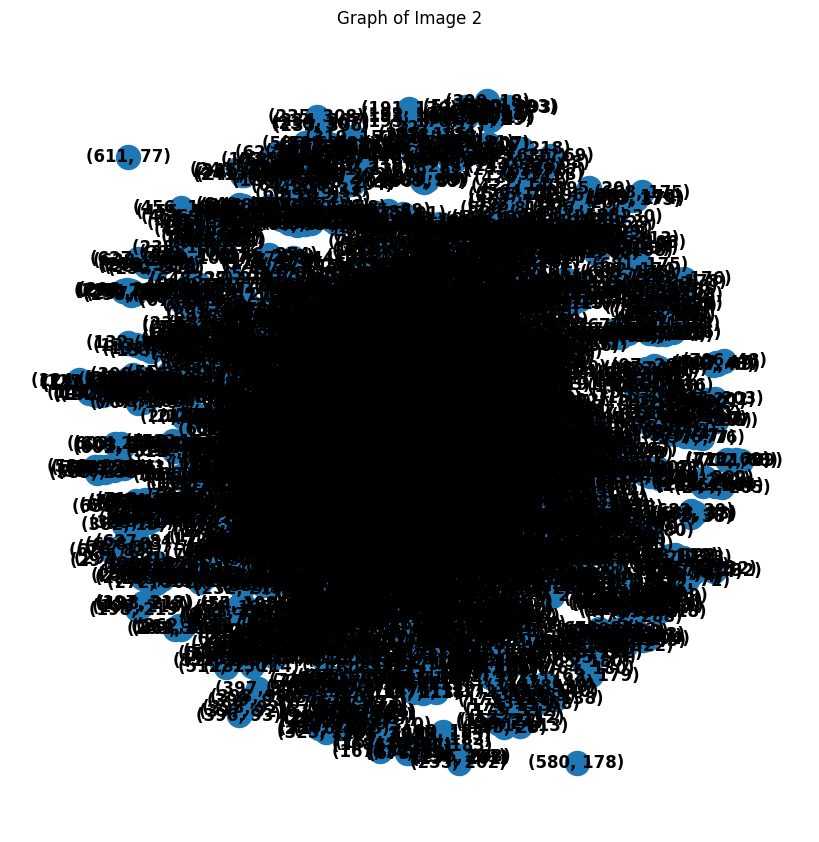

False


In [10]:
import cv2
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
def image_to_graph(image_path):
    # Load the image
    image = cv2.imread(image_path, 0)  # 0 for grayscale
    # Threshold the image
    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a graph
    G = nx.Graph()
    for contour in contours:
        for i in range(len(contour)):
            G.add_node(tuple(contour[i][0]))
            if i != 0:
                G.add_edge(tuple(contour[i - 1][0]), tuple(contour[i][0]))
    return G
def draw_graph(G, title):
    plt.figure(figsize=(8, 8))
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.title(title)
    plt.show()
    
def are_isomorphic(image_path1, image_path2):
    G1 = image_to_graph(image_path1)
    G2 = image_to_graph(image_path2)
    
#     draw_graph(G1, "Graph of Image 1")
#     draw_graph(G2, "Graph of Image 2")
    return nx.is_isomorphic(G1, G2)

# Test the function
image_path1 = 'sport16102.png'
image_path2 = 'sport16103.png'

print(are_isomorphic(image_path1, image_path2))


In [6]:
import cv2
import numpy as np

def is_image_included(large_image_path, small_image_path, threshold=0.8):
    # Load images
    large_image = cv2.imread(large_image_path)
    small_image = cv2.imread(small_image_path)

    # Convert images to grayscale
    large_gray = cv2.cvtColor(large_image, cv2.COLOR_BGR2GRAY)
    small_gray = cv2.cvtColor(small_image, cv2.COLOR_BGR2GRAY)
    #small image scale
    small_height, small_width = small_gray.shape[:2]
    # Template matching
    res = cv2.matchTemplate(large_gray, small_gray, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= threshold)

    # Check if small image is found in large image
    if np.any(res >= threshold):
        # Draw a rectangle around the found location
        for pt in zip(*loc[::-1]):  # Switch x and y locations
            cv2.rectangle(large_image, pt, (pt[0] + small_width, pt[1] + small_height), (0, 255, 0), 2)

        # Save the result image or display it
#         cv2.imwrite('result.png', large_image)
        cv2.imshow('Result', large_image)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        return True, loc
    else:
        return False, None

# Test the function
large_image_path = 'Large.jpg'
small_image_path = 'small.jpg'

found, location = is_image_included(large_image_path, small_image_path)

if found:
    print("Small image is included in the large image.")
    print("Location:", location)
else:
    print("Small image is not found in the large image.")


Small image is included in the large image.
Location: (array([194, 194, 195, 195, 195, 195, 195, 196, 196], dtype=int64), array([366, 367, 365, 366, 367, 368, 369, 367, 368], dtype=int64))


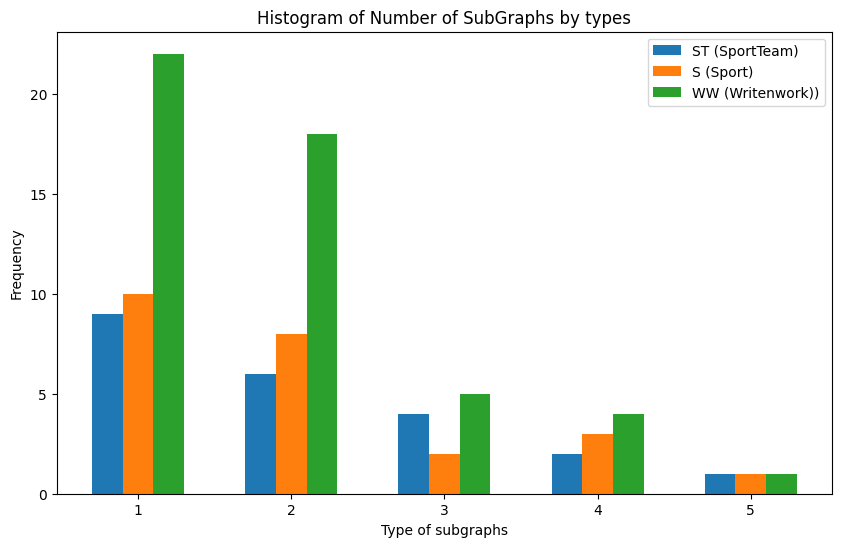

In [5]:
import numpy as np

# The data from the new image provided
categories = ['1', '2', '3', '4','5']
st_counts = [9, 6, 4, 2, 1]  # sportteam
s_counts = [10, 8, 2, 3, 1]   # sport
b_counts = [22, 18, 5, 4, 1]   # book

# Combine the counts into a single list for each bin
combined_counts = np.array([st_counts, s_counts, b_counts]).T

# Define the positions of the bars
bar_width = 0.2
r1 = np.arange(len(st_counts))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(r1, st_counts, width=bar_width, label='ST (SportTeam)')
bar2 = ax.bar(r2, s_counts, width=bar_width, label='S (Sport)')
bar3 = ax.bar(r3, b_counts, width=bar_width, label='WW (Writenwork))')

# Add labels and title
ax.set_xlabel('Level of subgraphs')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Number of SubGraphs by levels')
ax.set_xticks([r + bar_width for r in range(len(st_counts))])
ax.set_xticklabels(categories)

# Add a legend
ax.legend()

# Show the plot
plt.show()


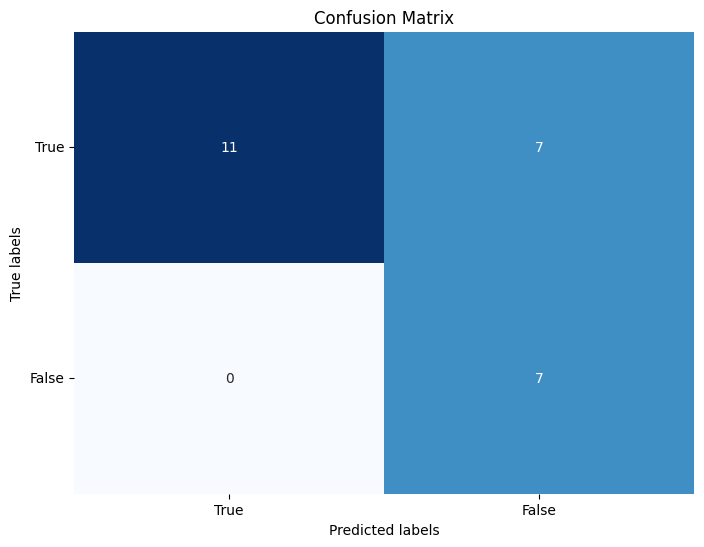

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assume we have the following true labels and predicted labels
true_labels = [1, 0, 1, 1, 0, 1, 0, 0, 0, 1]
predicted_labels = [1, 0, 1, 0, 0, 1, 0, 1, 0, 1]

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm= [[11, 7], [0, 7]]
# Plotting with seaborn for a more attractive appearance
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Labels, title and ticks
label_names = [ 'True','False']
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(label_names)) + 0.5, labels=label_names)
plt.yticks(ticks=np.arange(len(label_names)) + 0.5, labels=label_names, rotation=0)
plt.show()
